In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE


In [2]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/gmsc_data/cs-training.csv")


In [3]:
train_data.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
train_data.shape

(150000, 12)

In [5]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
train_data.columns = train_data.columns.str.strip()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
train_data.rename(columns={"SeriousDlqin2yrs": "Default"}, inplace=True)

In [8]:
train_data['Default'].value_counts(normalize=True)

,proportion
Default,
0,0.93316
1,0.06684


In [9]:
train_data.isnull().mean().sort_values(ascending=False)

,0
MonthlyIncome,0.198207
NumberOfDependents,0.026160
Unnamed: 0,0.000000
Default,0.000000
age,0.000000
RevolvingUtilizationOfUnsecuredLines,0.000000
DebtRatio,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000
NumberOfOpenCreditLinesAndLoans,0.000000
NumberOfTimes90DaysLate,0.000000


In [10]:
train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].median(), inplace=True)
train_data['NumberOfDependents'].fillna(train_data['NumberOfDependents'].median(), inplace=True)


/tmp/ipython-input-741199007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].median(), inplace=True)
/tmp/ipython-input-741199007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [11]:
train_data.isnull().mean().sort_values(ascending=False)

,0
Unnamed: 0,0.0
Default,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0


In [12]:
for col in ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']:
    train_data[col] = train_data[col].clip(upper=train_data[col].quantile(0.99))


In [13]:
train_data = train_data.drop('Unnamed: 0', axis=1)

In [14]:
X = train_data.drop("Default", axis=1)
y = train_data["Default"]


In [15]:
X.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [17]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [19]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_res)


LogisticRegression(max_iter=1000)

In [20]:
y_train_pred = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_pred = log_reg.predict_proba(X_test_scaled)[:, 1]


In [21]:
train_auc = roc_auc_score(y_train_res, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print("Train AUC:", train_auc)
print("Test AUC:", test_auc)


Train AUC: 0.8174803873326598
Test AUC: 0.8025486403755224


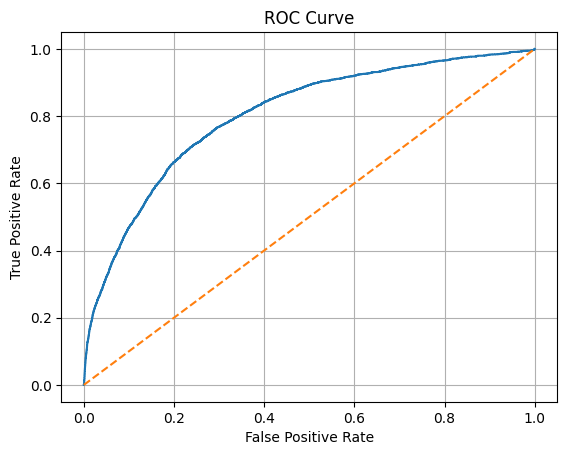

In [22]:
fpr, tpr,_= roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()


In [23]:
KS = max(tpr - fpr)
KS


np.float64(0.47126092660000085)

<Axes: >

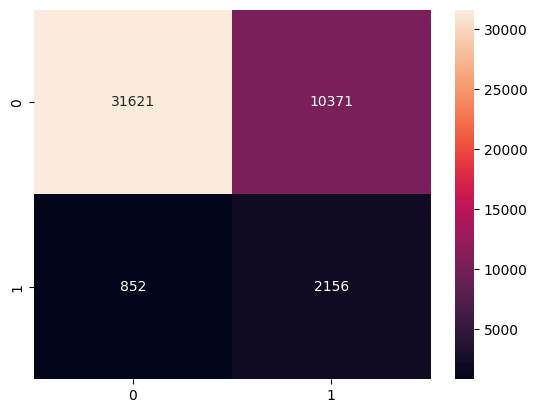

In [24]:
y_pred_label = (y_test_pred >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_label)
sns.heatmap(cm, annot=True, fmt='d')


In [25]:
print(classification_report(y_test, y_pred_label))


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     41992
           1       0.17      0.72      0.28      3008

    accuracy                           0.75     45000
   macro avg       0.57      0.73      0.56     45000
weighted avg       0.92      0.75      0.81     45000



In [26]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0],
})
coeff["OddsRatio"] = np.exp(coeff["Coefficient"])
coeff.sort_values(by="OddsRatio", ascending=False)


,Feature,Coefficient,OddsRatio
2,NumberOfTime30-59DaysPastDueNotWorse,2.160713,8.677322
6,NumberOfTimes90DaysLate,1.722562,5.598853
0,RevolvingUtilizationOfUnsecuredLines,1.129499,3.094105
5,NumberOfOpenCreditLinesAndLoans,0.180809,1.198186
9,NumberOfDependents,0.082598,1.086105
3,DebtRatio,-0.030409,0.970049
4,MonthlyIncome,-0.038946,0.961802
7,NumberRealEstateLoansOrLines,-0.155603,0.855899
1,age,-0.269101,0.764066
8,NumberOfTime60-89DaysPastDueNotWorse,-3.685103,0.025095


In [27]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train_res, X_train_sm)
result = logit_model.fit()
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train_res, X_train_sm)
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.526481
         Iterations 8


In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:               195964
Model:                          Logit   Df Residuals:                   195953
Method:                           MLE   Df Model:                           10
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.2404
Time:                        15:26:33   Log-Likelihood:            -1.0317e+05
converged:                       True   LL-Null:                   -1.3583e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.006      3.669      0.000       0.010       0.031
x1             1.1285      0.006    180.922      0.000       1.116       1.141
x2            -0.2690      0.006    -44.231      0.000      -0.281      -0.257
x3             2.1756      0.056     39.019      0.000       2.066       2.285
x4            -0.0304      0.006     -5.494      0.000      -0.041      -0.020
x5            -0.0393      0.006     -6.544      0.000      -0.051      -0.028
x6             0.1800      0.006     27.860      0.000       0.167       0.193
x7             1.7408      0.069     25.319      0.000       1.606       1.876
x8            -0.1550      0.007    -23.309      0.000      -0.168      -0.142
x9            -3.7145      0.079    -46.793      0.000      -3.870      -3.559
x10            0.0822      0.006     14.636      0.000       0.071       0.093
==============================================================================
"""